<a href="https://colab.research.google.com/github/rana-taqveem/ms-ai-ai-500/blob/main/25280030_PA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AI 500 - PA2: Unsupervised Learning**

**Name**:

**Roll Number**:

---

Before you start the assignment, here's an important clarification: this assignment is divided into two types of graded components—**Tasks** and **Questions**.

-  <span style="color: purple; font-size: 20px;">**Tasks**</span>: involve hands-on programming and require you to implement specific functionalities or solve problems using code.
-  <span style="color: green; font-size: 20px;">**Questions**</span>: are focused on theoretical and analytical interpretation, requiring you to analyze, explain, or draw insights from the tasks you’ve completed. You are **required** to either conduct additional analysis or to reference the coding <span style="color: purple; font-size: 20px;">**Tasks**</span> to supplement your answers to these questions.


Attempting both components is mandatory, as they are designed to complement each other.

**Note:**

- For the cells marked as #DO NOT CHANGE THIS CELL, you are still required to run those cells in order for your PA to be marked as complete. Please be careful about this.

-  When working in Jupyter notebooks, avoid reusing the same variable names across different cells. This can cause overwriting and errors. To avoid this, try using more descriptive variable names to keep track of their purpose and prevent mix-ups.

-  All cells in the notebook must be executed before submission and should display the expected results (graphs, plots, etc.). Any failure to run the cells and display the results will result in point deductions. Please ensure that the notebook is fully functional and the outputs are visible for review.

---

### **MARK SCHEME**


**Coding Tasks (Total 5 tasks, 44 marks)**

- 3 tasks: 10 marks each (30 marks total) – For core implementations.
- Remaining 2 tasks: 7 marks each (14 marks total) – For additional supportive tasks.

**Analytical Questions (Total 14 questions, 56 marks)**

- Main analysis per question: 2 marks (28 marks total) – For the core reasoning and insights.
- Supporting reference (code/math/supplementary per question): 2 marks (28 marks total) – Consistent across all, for evidence-based backing (e.g., code snippets, equations etc).

---

## Submission Instructions

- **Naming Convention**: Name your submission file using the format `RollNumber_PA2.ipynb`.
- **File Submission**: Submit only the `.ipynb` file (Jupyter Notebook) containing your complete code, markdown cells, and outputs. You are not required to submit any prompt logs, but please maintain those on your own end in case of any misunderstanding.
- **Deadline**: Submit your assignment by **11:55 PM PKT on Wednesday, October 15, 2025**. Late submissions will incur a penalty as per the **Late Submission Policy** detailed in the outline.

Good luck, and ensure all tasks are fully implemented and documented!

---

## IMPORTS
-  You are not allowed to change these
-  You cannot import any additional libraries

In [ ]:
import numpy as np  # For numerical operations and array manipulations
import matplotlib.pyplot as plt  # For plotting and visualization
import pandas as pd # For data handling and CSV file reading
from sklearn.preprocessing import StandardScaler # For feature scaling
from sklearn.metrics import precision_score, recall_score, f1_score, silhouette_score  # For evaluation metrics
from sklearn.decomposition import PCA # For dimensionality reduction (PCA for visualization)
import requests # For downloading images or data from URLs (used in Tasks 1 and 2)
from io import BytesIO # For handling binary data streams (used with requests)
from PIL import Image # For image processing (used in Tasks 1 and 2)
import cv2 # For computer vision tasks
from sklearn.manifold import TSNE # Again useful for NL dimensionality reduction

print("Import working")

: 

In [ ]:
print("Test")

: 

## **Part 1:** Image Segmentation with Clustering (- marks)

**Objective:** This task explores the application of unsupervised clustering techniques to partition an image into meaningful regions based on pixel similarities. By implementing algorithms like K-means and K-medoids, you will investigate how to automatically segment visual data, which is crucial for tasks like object recognition and image editing, offering a foundation for understanding pattern recognition in computer vision.

In [ ]:
#DO NOT CHANGE THIS CELL

url = "https://media.wired.com/photos/5b7c67dff521ce3ac9ba45e9/16:9/w_2240,h_1260,c_limit/post10%5Bhttps-_goo.gl_maps_g65Rg5BDBsQ2%5D-(1).jpg"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = np.array(img)

img_resized = np.array(Image.fromarray(img).resize((100, 100)))
height, width, _ = img_resized.shape
pixels = img_resized.reshape(-1, 3).astype(float) / 255.0  # normalize

def rgb_to_ycbcr(rgb):
    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]
    y = 0.299 * r + 0.587 * g + 0.114 * b
    cb = 0.5 * b - 0.1687 * r - 0.3313 * g + 0.5
    cr = 0.5 * r - 0.4187 * g - 0.0813 * b + 0.5
    return np.column_stack((y, cb, cr))

pixels_ycbcr = rgb_to_ycbcr(pixels)

features = pixels_ycbcr

: 

In [ ]:
#DO NOT CHANGE THIS CELL

plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.show()

: 

<span style="color: purple; font-size: 20px;">**Task 1.1:**</span>

In this task, you will implement clustering algorithms to group data points based on their features. Your goal is to create functions for initializing and performing two popular clustering techniques. Follow these steps to complete the task:

-  Implement a smart **initialization method for K-means clustering** that selects initial centroids to improve convergence.
-  Develop the **K-means algorithm**, allowing for a custom initialization option to enhance clustering efficiency.
-  Create a **K-medoids algorithm**, which uses actual data points as cluster representatives instead of means, focusing on robustness to outliers.
-  Use NumPy for efficient vectorized operations to assign points to clusters and update centroids or medoids.

Hint: Pay attention to the iteration logic and convergence checks in each algorithm. Start by understanding how distances are calculated and minimized to form clusters.

In [12]:
def kmeanspp_init(X, k):
    n = X.shape[0]
    centroids = np.zeros((k, X.shape[1]), dtype=np.float64)
    all_distances = np.full((n, k), np.inf, dtype=np.float64)
    min_distances = np.full(n, np.inf, dtype=np.float64)
    probabilities = np.zeros(n, dtype=np.float64)
    #YOUR CODE HERE

    centroids[0] = X[np.random.randint(n)]
    for counter in range(0, k-1):
        for i, pixel in enumerate(X):
            all_distances[i, counter] = np.sum(np.square(centroids[counter] - pixel))

        min_distances = np.min(all_distances, axis=1)
        total_distance = float(np.sum(min_distances))

        if total_distance == 0:
            probabilities = np.full(n, 1/n)
        else:
            for i, distance in enumerate(min_distances):
                probabilities[i] = distance/total_distance

        centroids[counter+1] = X[np.random.choice(len(min_distances), p=probabilities)]

    return centroids

def kmeanspp_init_opt(X, k):
    n = X.shape[0]
    centroids = np.zeros((k, X.shape[1]), dtype=np.float64)
    all_distances = np.full((n, k), np.inf, dtype=np.float64)
    min_distances = np.full(n, np.inf, dtype=np.float64)
    probabilities = np.zeros(n, dtype=np.float64)

    centroids[0] = X[np.random.randint(n)]
    for counter in range(0, k-1):
        X_L2_norm = np.sum(X**2, axis=1)
        Ci_L2_norm = np.sum(centroids[counter]**2)
        X_dot_Ci = 2 * np.dot(X, centroids[counter])

        all_distances = X_L2_norm + Ci_L2_norm - X_dot_Ci

        min_distances = np.minimum(min_distances, all_distances)
        min_distances = np.clip(min_distances, 0, None)
        total_distance = float(np.sum(min_distances))

        if total_distance == 0:
            probabilities = np.full(n, 1/n)
        else:
            probabilities = np.divide(min_distances, total_distance)

        centroids[counter+1] = X[np.random.choice(len(min_distances), p=probabilities)]

    return centroids

def kmeans(X, k, max_iter=100, init='random'):
    n, d = X.shape
    if init == 'kmeanspp':
        centroids = kmeanspp_init(X, k)
    else:
        centroids = X[np.random.choice(n, k, replace=False)]

    #YOUR CODE HERE

    iteration_num = 0
    while True and iteration_num <= max_iter:

        all_distances = np.full((n, k), np.inf, dtype=np.float64)
        min_distances = np.full(n, np.inf, dtype=np.float64)

        # using loops to compute distance
        for i, centroid in enumerate(centroids):
            for j, pixel in enumerate(X):
                all_distances[j, i] = np.sqrt(np.sum(np.square(centroid - pixel)))

        centroid_indices = np.argmin(all_distances, axis=1)

        uniqure_centiords, inverse_indices, counts = np.unique(centroid_indices, return_counts=True, return_inverse=True)
        avg_y_for_centriod = np.bincount(inverse_indices, weights=X[:, 0])/counts
        avg_Cb_for_centriod = np.bincount(inverse_indices, weights=X[:, 1])/counts
        avg_Cr_for_centriod = np.bincount(inverse_indices, weights=X[:, 2])/counts
        new_centroids = np.zeros((k, X.shape[1]), dtype=float)

        for i, new_centroid in enumerate(new_centroids):
            new_centroid[0] = avg_y_for_centriod[i]
            new_centroid[1] = avg_Cb_for_centriod[i]
            new_centroid[2] = avg_Cr_for_centriod[i]

        if np.allclose(centroids, new_centroids):
            break  # Centroids have converged

        centroids = new_centroids.copy()
        iteration_num +=1
    return inverse_indices, centroids

def kmeans_optimized(X, k, max_iter=100, init='random'):
    n, d = X.shape
    if init == 'kmeanspp':
        centroids = kmeanspp_init_opt(X, k)
    else:
        centroids = X[np.random.choice(n, k, replace=False)]

    iteration_num = 0
    while True and iteration_num <= max_iter:

        # using the vector L2 Norm and Euclidean distance
        # Features L2 Norm and reshaing to column vector to enable addition via broadcasting
        #  X [[x1**2)],           Centriod [[ c1**2, c2**2, c3**2, c4**2, c5**2]]
        #     [x2**2)]
        #     [x3**2)]        +
        #       .
        #       .
        #     [x10000**2)]]
        #
        X_L2 = np.sum(X**2, axis=1).reshape(-1, 1)                 # Features L2 Norm and reshaing to column vector to enable addition via broadcasting
        Centroid_L2 = np.sum(centroids**2, axis=1).reshape(1, -1)  # Centroid Vector L2 Norm and reshaing to row vector to enable addition via broadcasting
        X_dot_C = np.multiply(np.matmul(X, centroids.T), 2)        # computing dot product between features and centroids

        # ||X-X||**2  = ||X|| + ||C|| - 2 X.Ct

        squared_dis = X_L2 + Centroid_L2 - X_dot_C
        squared_dis = np.maximum(squared_dis,0)
        all_distances = np.sqrt(squared_dis)

        centroid_indices = np.argmin(all_distances, axis=1)

        uniqure_centroids, inverse_indices, counts = np.unique(centroid_indices, return_counts=True, return_inverse=True)
        new_centroids = np.zeros((k, X.shape[1]), dtype=float)
        for f in range(X.shape[1]):
            new_centroids[:, f] = np.bincount(inverse_indices, weights=X[:, f])/counts

        if np.allclose(centroids, new_centroids):
            break  # Centroids have converged

        centroids = new_centroids.copy()
        iteration_num +=1

    return inverse_indices, centroids

def kmedoids(X, k, max_iter=100):
    n, d = X.shape
    medoids_idx = np.random.choice(n, k, replace=False)
    medoids = X[medoids_idx]

    #YOUR CODE HERE

    expanded = X[:, np.newaxis ]
    pairwise_diff = expanded - X
    pairwise_distances = np.linalg.norm(pairwise_diff, axis =2)

    iteration_num = 0
    while True and iteration_num <= max_iter:

        all_distances = np.full((n, k), np.inf, dtype=np.float64)
        new_mediods_idx = np.zeros(k, np.int64)

        X_L2 = np.sum(X**2, axis=1).reshape(-1,1)
        mediods_L2 = np.sum(medoids**2, axis=1).reshape(1,-1)
        X_dot_C = np.multiply(np.matmul(X, medoids.T), 2)
        all_distances = X_L2 + mediods_L2 - X_dot_C

        centroid_indices = np.argmin(all_distances, axis=1)

        unique_mediods, inverse_mediod_indices, counts = np.unique(centroid_indices, return_counts=True, return_inverse=True)
        original_indices = np.arange(n)
        sorted_mediod_indices =  original_indices[np.argsort(inverse_mediod_indices)]
        sorted_inverse_mediod_indices = inverse_mediod_indices[np.argsort(inverse_mediod_indices)]
        split_mediod_indices = np.nonzero(np.diff(sorted_inverse_mediod_indices))[0] + 1
        mediod_wise_clusters = np.split(sorted_mediod_indices, split_mediod_indices)


        for i, cluster in enumerate(mediod_wise_clusters):
            cluster_distances = pairwise_distances[cluster][:, cluster]
            sum_distances = np.sum( cluster_distances , axis =1)
            best_medoid_idx = np.argmin(sum_distances)
            new_mediods_idx[i] = cluster[best_medoid_idx]

        if np.array_equal(medoids_idx, new_mediods_idx):
            break  # Centroids have converged

        medoids_idx = new_mediods_idx.copy()
        medoids = X[medoids_idx]

        # medoids = new_mediods.copy()
        iteration_num +=1

    return inverse_mediod_indices, medoids


In [13]:
#DO NOT CHANGE THIS CELL
#We have defined the implementation of the Agglomerative Clustering algorithm for you.

def agglomerative(X, k):
    n = X.shape[0]
    # since n is large, lets sample a subset
    if n > 1000:
        sample_idx = np.random.choice(n, 1000, replace=False)
        X_sample = X[sample_idx]
    else:
        X_sample = X
        sample_idx = np.arange(n)

    m = X_sample.shape[0]
    clusters = list(range(m))
    dist_matrix = np.linalg.norm(X_sample[:, np.newaxis] - X_sample, axis=2)

    while len(set(clusters)) > k:

        # find closest pairs
        min_dist = np.inf
        pair = (-1, -1)
        for i in range(m):
            for j in range(i+1, m):
                if clusters[i] != clusters[j] and dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    pair = (clusters[i], clusters[j])

        # merge
        for i in range(m):
            if clusters[i] == pair[1]:
                clusters[i] = pair[0]

    # map to labels
    unique_clusters = list(set(clusters))
    label_map = {c: i for i, c in enumerate(unique_clusters)}
    sample_labels = np.array([label_map[c] for c in clusters])

    # assign all points to nearest sample cluster centers (approximate)
    centers = np.array([X_sample[sample_labels == i].mean(axis=0) for i in range(k)])
    distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    labels = np.argmin(distances, axis=1)

    return labels

In [ ]:
#DO NOT CHANGE THIS CELL (except for the value of k, if you want to)
val_k = 3
X = features


labels_kmeans, centroids_kmeans = kmeans_optimized(features, k=val_k, init='kmeanspp')
labels_kmedoids, medoids = kmedoids(features, k=val_k)
labels_agg = agglomerative(features, k=val_k)

In [ ]:
#DO NOT CHANGE THIS CELL
def visualize_segmentation(img, labels, k, title):
    segmented = np.zeros_like(img)
    for i in range(k):
        mask = (labels == i).reshape(img.shape[:2])
        color = img[mask].mean(axis=0)
        segmented[mask] = color.astype(int)
    plt.figure(figsize=(8, 6))
    plt.imshow(segmented)
    plt.title(title)
    plt.show()

visualize_segmentation(img_resized, labels_kmeans, val_k, 'K-means++ Segmentation')
visualize_segmentation(img_resized, labels_kmedoids, val_k, 'K-medoids Segmentation')
visualize_segmentation(img_resized, labels_agg, val_k, 'Agglomerative Segmentation')

<span style="color: purple; font-size: 20px;">**Task 1.2:**</span>

In this task, you will implement a function to evaluate the quality of clustering by calculating the **Within-Cluster Sum of Squares (WCSS)**.  
This metric measures the compactness of clusters. Follow these steps to complete the task:

- Define a function that takes data points (`X`), cluster labels, and cluster centers (centroids or medoids) as inputs.  
- Compute WCSS using the formula:

$$
\text{WCSS} = \sum_{i=1}^{k} \sum_{x \in C_i} \| x - c_i \|^2
$$

where \\( k \\) is the number of clusters, \\( C_i \\) is the set of points in cluster \\( i \\), \\( x \\) is a point, and \\( c_i \\) is the cluster center.  

- Use NumPy to calculate squared Euclidean distances between points and their assigned centers.  
- Handle edge cases, such as empty clusters, by skipping them in the summation.  
- Return the total WCSS score as a float.  

**Hint:** Ensure the shape of inputs aligns correctly.


In [7]:
def calculate_wcss(X, labels, centroids_or_medoids):
    """
    Calculate Within-Cluster Sum of Squares manually.

    Parameters:
    - X: numpy array of shape (n_samples, n_features) containing the data points
    - labels: numpy array of shape (n_samples,) containing cluster labels
    - centroids_or_medoids: numpy array of shape (n_clusters, n_features) containing cluster centers

    Returns:
    - wcss: float, the total WCSS score
    """
    unique_labels = np.unique(labels)
    wcss = 0.0

    # print(f"labels: {labels}")

    # print(f"Number of clusters: {n_clusters}")
    # print(f"Centroids or Medoids shape: {centroids_or_medoids.shape}")
    # print(f"Data points shape: {X.shape}")
    # print(f"Labels shape: {labels.shape}")

    for i, label in enumerate(unique_labels):
      points_in_k = X[labels == label]
      if points_in_k.shape[0] > 0:
        wcss += np.sum((points_in_k - centroids_or_medoids[i])**2)

    print(f"wcss: {wcss}")
    return wcss

In [ ]:
#DO NOT CHANGE THIS CELL

def calculate_metrics(X, labels, centroids_or_medoids=None, algorithm_name=""):
    if len(set(labels)) < 2:
        sil_score = 0
    else:
        sil_score = silhouette_score(X, labels)

    if centroids_or_medoids is not None and len(np.unique(labels)) > 0:
        wcss = calculate_wcss(X, labels, centroids_or_medoids)
    else:
        wcss = 0.0

    print(f"{algorithm_name} Metrics:")
    print(f"  Silhouette Score: {sil_score:.4f}")
    print(f"  Within-Cluster Sum of Squares (WCSS): {wcss:.4f}\n")
    return sil_score, wcss

sil_kmeans, wcss_kmeans = calculate_metrics(features, labels_kmeans, centroids_kmeans, "K-means++")
sil_kmedoids, wcss_kmedoids = calculate_metrics(features, labels_kmedoids, medoids, "K-medoids")
sil_agg, wcss_agg = calculate_metrics(features, labels_agg, np.array([features[labels_agg == i].mean(axis=0) for i in range(val_k) if np.any(labels_agg == i)]), "Agglomerative")

algorithms = ['K-means++', 'K-medoids', 'Agglomerative']
sil_scores = [sil_kmeans, sil_kmedoids, sil_agg]
wcss_values = [wcss_kmeans, wcss_kmedoids, wcss_agg]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(algorithms, sil_scores, color=['blue', 'orange', 'green'])
plt.title('Silhouette Scores by Algorithm')
plt.ylabel('Silhouette Score')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(algorithms, wcss_values, color=['blue', 'orange', 'green'])
plt.title('Within-Cluster Sum of Squares (WCSS) by Algorithm')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

plt.subplot(1, 3, 1)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.5, s=10)
plt.scatter(pca.transform(centroids_kmeans)[:, 0], pca.transform(centroids_kmeans)[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-means++ Clusters with Centroids')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_kmedoids, cmap='viridis', alpha=0.5, s=10)
plt.scatter(pca.transform(medoids)[:, 0], pca.transform(medoids)[:, 1], c='red', marker='x', s=200, label='Medoids')
plt.title('K-medoids Clusters with Medoids')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels_agg, cmap='viridis', alpha=0.5, s=10)
centroids_agg = np.array([features[labels_agg == i].mean(axis=0) for i in range(val_k) if np.any(labels_agg == i)])
plt.scatter(pca.transform(centroids_agg)[:, 0], pca.transform(centroids_agg)[:, 1], c='red', marker='x', s=200, label='Centers')
plt.title('Agglomerative Clusters with Centers')
plt.legend()

plt.tight_layout()
plt.show()

---
## Analytical Questions

In [ ]:
# USE this space and add more cells below this to supplement the answers that you give to the questions that follow
# This is RECOMMENDED. If you feel a question does not require additional analysis, you may refer to the coding tasks above
# Grounding your responses in empirical evidence is standard practice in AI/ML research, so it is important that you support your results with evidence from either:

#       - the coding tasks above
#       - novel analysis conducted below
#       - if questions are of a more foundational nature, then reference the underlying mathematics to back your response.


In [ ]:
# Your code here (optional)
#---


<span style="color: green; font-size: 20px;">**Question 1a:**</span> How does varying the number of clusters (k) in K-means++ (e.g., from 3 to 10) affect the segmentation quality, as measured by metrics like mean squared error (MSE) between the original and segmented images? Experiment with at least three different k values and discuss any observed over-segmentation or under-segmentation.

Answer:

<span style="color: green; font-size: 20px;">**Question 1b:**</span> Based on  visualizations that you produce, critique the choice of YCbCr over RGB features—does it enhance color-based segmentation accuracy (e.g., better region boundaries)

Answer:

<span style="color: green; font-size: 20px;">**Question 1c:**</span> Explain how the Euclidean distance formula in K-means (minimizing the sum of squared distances from points to centroids) is implemented in the NumPy-based distance calculation step (np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)), and why this vectorized approach improves efficiency over a loop-based method.

<span style="color: green; font-size: 20px;">**Question 1d:**</span> Based on the computed Silhouette Scores and WCSS values for K-means++, K-medoids, and Agglomerative Clustering, compare how the algorithms perform in terms of cluster separation and compactness—why might one algorithm show higher or lower scores than the others, considering their underlying mechanisms like centroid initialization, medoid selection, or hierarchical merging?

Answer:


<span style="color: green; font-size: 20px;">**Question 1e:**</span> Analyze the hierarchical nature of Agglomerative Clustering results: In what ways does it avoid the need for predefined k compared to centroid-based methods, and does this lead to more meaningful regions in the segmented image, or does it introduce biases from the bottom-up merging?

Answer:

---

## **Part 2:** Anomaly Detection in Credit Card Transactions (- marks)

**Objective:** This task delves into detecting unusual patterns in financial data using clustering methods, focusing on identifying fraudulent credit card transactions. By exploring algorithms like K-means++, K-medoids, and DBSCAN, you will address a real-world challenge in cybersecurity and fraud prevention, highlighting the importance of anomaly detection in protecting economic systems.

**Task Preparation:** Before starting the analysis, please download the required dataset from KAGGLE to work with the credit card fraud detection tasks. Follow these steps:

- Visit the following link: [Credit Card Fraud Detection Dataset](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud).
- Download the `creditcard.csv` file directly, or extract from zipped folder after downloading the dataset.
- Save the file in your working directory to ensure the code can access it, or add to runtime if working with Colab.



In [ ]:
# DO NOT CHANGE THIS CELL

In [8]:
#DO NOT CHANGE THIS CELL

df = pd.read_csv('creditcard.csv')

# features: drop Time (not useful), use V1-V28 and Amount
X = df.drop(['Time', 'Class'], axis=1).values
y = df['Class'].values  # y is our target

# preprocessing: standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# subsampling
fraud_idx = np.where(y == 1)[0]
normal_idx = np.random.choice(np.where(y == 0)[0], 5000, replace=False)
sample_idx = np.concatenate((normal_idx, fraud_idx))
X_sample = X_scaled[sample_idx]
y_sample = y[sample_idx]

print(f'Sampled data: {X_sample.shape[0]} points, {np.sum(y_sample)} fraud')

Sampled data: 5492 points, 492 fraud


<span style="color: purple; font-size: 20px;">**Task 2.1:**</span> In this task, you are tasked with conducting an exploratory data analysis (EDA) of the Credit Card Fraud dataset. The objective is to gain initial insights into the data through provided analyses, which include summary statistics, distributions, and correlations. You are encouraged to extend this exploration by incorporating your own investigations, such as additional visualizations, feature correlation analyses, or anomaly pattern identification, to deepen your understanding of the dataset.

In [ ]:
#YOUR CODE HERE

def generate_random_rgb_color():
    """Generates a random RGB color as a tuple (r, g, b)."""
    return tuple(np.random.rand(3))

# Example usage:
random_color = generate_random_rgb_color()

print(X.shape)
transaction_classes = ['Normal', 'Fraud']

# counts
data = [X_sample.shape[0], np.sum(y_sample)]
plt.bar(transaction_classes, data)
plt.xlabel('Transaction Classes')
plt.ylabel('Count')
plt.show()

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15,20))


columns = ['V'+str(i) for i in range(1,29)]

for column, ax in zip(columns, axes.flatten()):
  data_normal = df[df['Class'] == 0][column].values
  num_bins = 50
  n, bins, _ = ax.hist(data_normal, num_bins, density=True, color='blue', alpha=0.5)
  ax.set_label('Normal')
  ax.set_title(f"Distribution of Feature{column}", fontweight='bold')

  data_fraud = df[df['Class'] == 1][column].values
  num_bins = 50
  n, bins, _ = ax.hist(data_fraud, num_bins, density=True, color='red', alpha=0.5)
  ax.set_label('Fraud')
  ax.set_title(f"Distribution of Feature{column}", fontweight='bold')

plt.tight_layout()
plt.show()

print(columns)

# Transaction Amount
normal_ammounts = df[df['Class'] == 0]['Amount']
fraud_ammounts = df[df['Class'] == 1]['Amount']
data = [normal_ammounts, fraud_ammounts]
plt.boxplot(data, showmeans=True)
plt.ylim(0,5000)
plt.xticks([1, 2], transaction_classes)
plt.ylabel('Amount ($)')

plt.title('Amount grouped by Normal vs Fraud Transactions')
plt.show()

# mean
means = df.groupby('Class')['Amount'].mean()
std = df.groupby('Class')['Amount'].std()
plt.bar(transaction_classes, means.values, yerr=std.values, capsize=5)
plt.ylabel('Mean Amount ($) and Std Spread')
plt.xlabel('Transaction Classes')
plt.title('Amount Mean and Std for Normal vs Fraud Transactions')
plt.show()
# group by class
df.groupby('Class')['Amount'].describe()

features_of_interest = ['V2', 'V3', 'V4', 'V10', 'V11', 'V12', 'V14', 'V16']

fig1, axes1 = plt.subplots(nrows=2, ncols=4, figsize=(12,7))

for foi, ax in zip(features_of_interest, axes1.flatten()):
  normal = df[df['Class'] == 0][foi].dropna()
  fraud = df[df['Class'] == 1][foi].dropna()
  data = [normal, fraud]
  ax.set_xticks([1, 2], transaction_classes)
  ax.violinplot(data)
  ax.set_label('Sensitivity Range')
  ax.set_title(f"{foi} for Normal vs Fraud ", fontweight='bold')
plt.tight_layout()
plt.show()

correlation_matrix = df.corr()
columns = correlation_matrix.columns
plt.figure(figsize=(8,6))

plt.imshow(correlation_matrix, cmap='autumn', interpolation='nearest')

# Add colorbar
plt.colorbar()

plt.xticks(range(len(columns)), columns, rotation=90)
plt.yticks(range(len(columns)), columns)
plt.title("Heatmap with different color")
plt.show()

#  df.groupby('Class')['V5'].describe()
df.groupby('Class')['Amount'].describe()




Add the relevant functions in the cell below, you may use your implementations from **Part 1**

In [9]:
# From Task 1 (copy the functions from the previous part)
def kmeanspp_init_wrapper(X, k):
    # n = X.shape[0]
    # centroids = np.zeros((k, X.shape[1]))
    # centroids[0] = X[np.random.randint(n)]
    # distances = np.full(n, np.inf)

    #YOUR CODE HERE

    return kmeanspp_init(X, k)

def kmeans_wrapper(X, k, max_iter=100, init='kmeanspp'):
    # n, d = X.shape
    # if init == 'kmeanspp':
    #     centroids = kmeanspp_init(X, k)
    # else:
    #     centroids = X[np.random.choice(n, k, replace=False)]

    # #YOUR CODE HERE

    return kmeans_optimized(X, k, max_iter, init)

def kmedoids_wrapper(X, k, max_iter=100):
    # n, d = X.shape
    # medoids_idx = np.random.choice(n, k, replace=False)
    # medoids = X[medoids_idx]

    # #YOUR CODE HERE

    return kmedoids(X, k, max_iter)


<span style="color: purple; font-size: 20px;">**Task 2.2:**</span> In this task, you will implement a density-based clustering algorithm to identify clusters and noise in a dataset. Your goal is to develop a function that groups points based on their density. Follow these steps to complete the task:

- Implement the DBSCAN algorithm, which relies on the concept of density-reachable points within a specified radius (eps).  
- Define a `region_query` function to calculate the Euclidean distance \\( \| x_i - x_j \| \\) between a point and all others, returning points within the eps radius.  
- Create an `expand_cluster` function to grow clusters by checking if a point has at least `min_samples` neighbors, using the density-connectivity rule \\( \text{number of points} \geq \min_samples \\).  
- Assign labels where -1 indicates noise, and increment cluster IDs for core points with sufficient neighbors.  


Hint: Focus on the iterative expansion process and how density thresholds determine cluster boundaries.

In [ ]:
def dbscan(X, eps, min_samples):
    n = X.shape[0]
    labels = np.full(n, -1)  # -1: noise
    cluster_id = 0

    print(f"Shape of data: {X.shape}")

    expanded = X[:, np.newaxis ]

    print(f"Shape of expanded {expanded.shape}")
    pairwise_diff = expanded - X
    print(f"Shape of pairwise_diff {pairwise_diff.shape}")
    pairwise_distances = np.linalg.norm(pairwise_diff, axis =2)

    print(f"pariwise_distance shape: {pairwise_distances.shape}")
    neighbors = np.where(pairwise_distances <= eps)
    # print(f"neighbor array len: {len(neighbors)}")
    # neighbor_0 = neighbors[0]
    # neighbor_1 = neighbors[1]
    # print ( f" Neighbor indices[0] Shape : { neighbor_0 }")
    # print ( f" Neighbor indices[1] Shape : { neighbor_1 }")

    point_neighbors = []
    current_point = neighbors[0]
    
    for next_point, i in enumerate(neighbors[0]):
        if current_point == next_point:
            point_neighbors.append(i)

        else:
            if len(point_neighbors) >= min_samples:
                print(f"We found a cluster with point: {current_point} with neighbour indices {point_neighbors}")
                current_point = next_point
    # #YOUR CODE HERE

    # return labels



In [14]:
#DO NOT CHANGE THIS CELL (Unless you want to experiment with hyperparamters)


# --------------K-means++ applied---------------
labels_kmeans, _ = kmeans_wrapper(X_sample, k=3)

cluster_sizes = np.bincount(labels_kmeans) # map anomaly cluster: we assume here that the smaller cluster is fraud (anomaly)
anomaly_cluster_kmeans = np.argmin(cluster_sizes)
pred_kmeans = (labels_kmeans == anomaly_cluster_kmeans).astype(int)

# -----------K-medoids applied--------------
labels_kmedoids, _ = kmedoids_wrapper(X_sample, k=3)
cluster_sizes = np.bincount(labels_kmedoids)
anomaly_cluster_kmedoids = np.argmin(cluster_sizes)
pred_kmedoids = (labels_kmedoids == anomaly_cluster_kmedoids).astype(int)

# -----------DBSCAN applied(tune eps and min_samples for the dataset)---------------

# labels_dbscan = dbscan(X_sample, eps=4.0, min_samples=10)  # adjust based on data scale
# noise (-1) as anomalies (fraud)
# pred_dbscan = (labels_dbscan == -1).astype(int)

Visualize Clusters (PCA + t-SNE for 2D Projection)

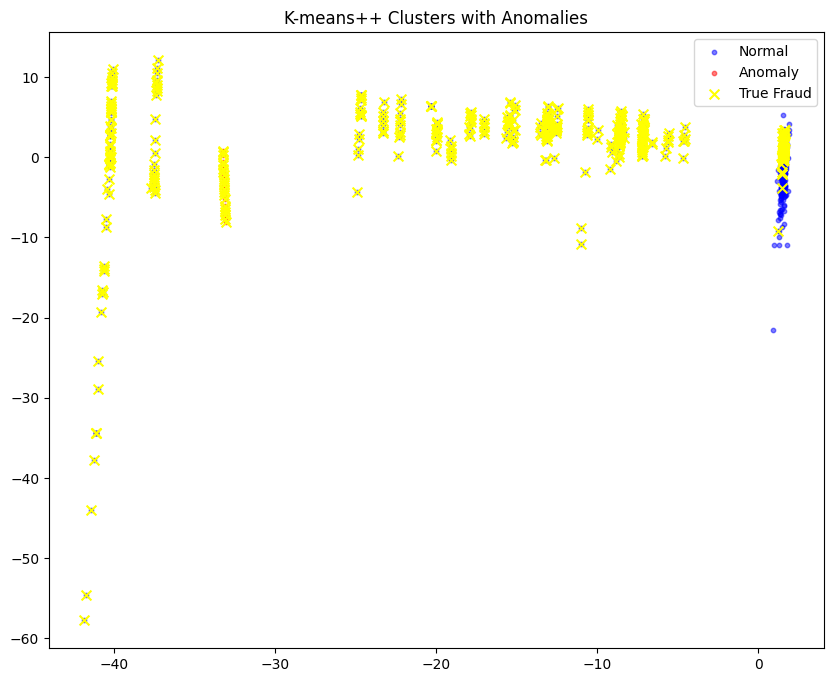

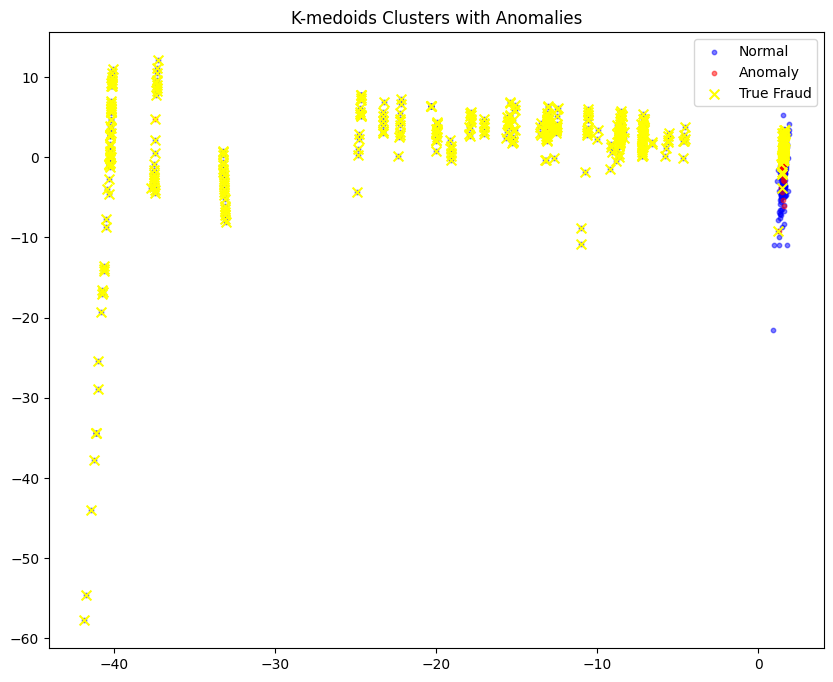

NameError: name 'labels_dbscan' is not defined

In [15]:
#DO NOT CHANGE THIS CELL

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)

def plot_clusters_enhanced(X_pca, labels, y_true, title):
    plt.figure(figsize=(10, 8))

    if -1 in labels:
        anomaly_mask = (labels == -1)
    else:
        anomaly_mask = (labels == np.argmin(np.bincount(labels[labels >= 0])))
    plt.scatter(X_pca[~anomaly_mask, 0], X_pca[~anomaly_mask, 1], c='blue', label='Normal', alpha=0.5, s=10)
    plt.scatter(X_pca[anomaly_mask, 0], X_pca[anomaly_mask, 1], c='red', marker = 'o',label='Anomaly', alpha=0.5, s=10)

    plt.scatter(X_pca[y_true == 1, 0], X_pca[y_true == 1, 1], c='yellow',marker = 'x', label='True Fraud', s=50)
    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters_enhanced(X_pca, labels_kmeans, y_sample, 'K-means++ Clusters with Anomalies')
plot_clusters_enhanced(X_pca, labels_kmedoids, y_sample, 'K-medoids Clusters with Anomalies')
plot_clusters_enhanced(X_pca, labels_dbscan, y_sample, 'DBSCAN Clusters with Anomalies')

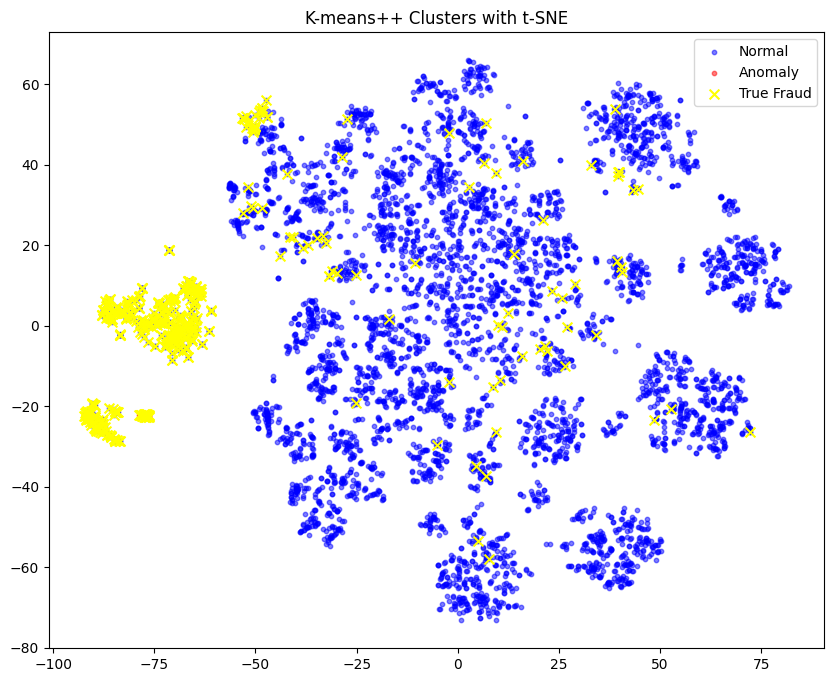

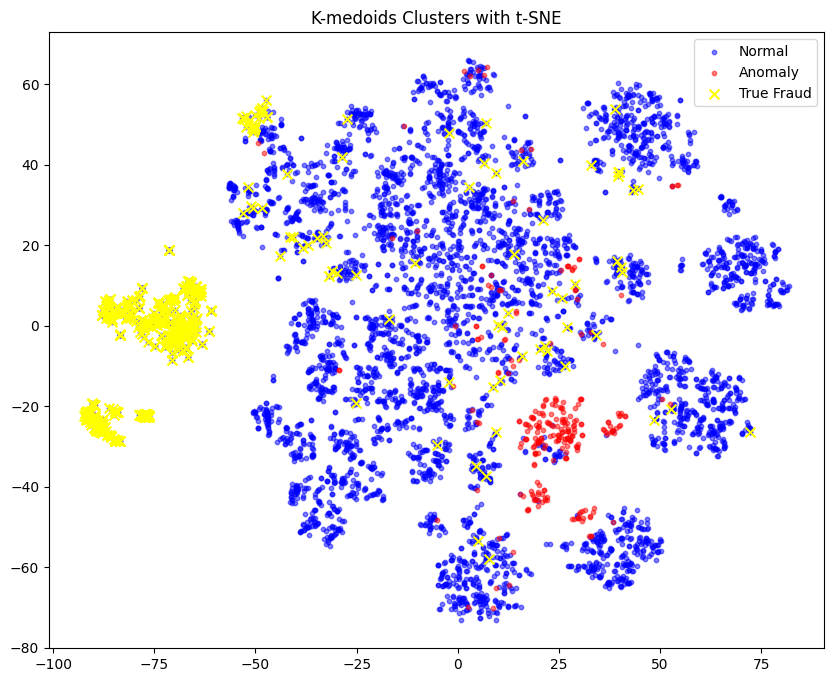

NameError: name 'labels_dbscan' is not defined

In [16]:
#DO NOT CHANGE THIS CELL

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)

def plot_clusters_tsne(X_tsne, labels, y_true, title):
    plt.figure(figsize=(10, 8))

    if np.any(labels < 0):
        anomaly_mask = (labels == -1)
    else:
        anomaly_mask = (labels == np.argmin(np.bincount(labels + (labels < 0).astype(int))))

    plt.scatter(X_tsne[~anomaly_mask, 0], X_tsne[~anomaly_mask, 1], c='blue', label='Normal', alpha=0.5, s=10)

    plt.scatter(X_tsne[anomaly_mask, 0], X_tsne[anomaly_mask, 1], c='red', marker = 'o', label='Anomaly', alpha=0.5, s=10)

    plt.scatter(X_tsne[y_true == 1, 0], X_tsne[y_true == 1, 1], c='yellow', marker = 'x', label='True Fraud', s=50)
    plt.title(title)
    plt.legend()
    plt.show()


plot_clusters_tsne(X_tsne, labels_kmeans, y_sample, 'K-means++ Clusters with t-SNE')
plot_clusters_tsne(X_tsne, labels_kmedoids, y_sample, 'K-medoids Clusters with t-SNE')
plot_clusters_tsne(X_tsne, labels_dbscan, y_sample, 'DBSCAN Clusters with t-SNE')

In [ ]:
#DO NOT CHANGE THIS CELL

def evaluate(pred, y_true, algo_name):
    sil = silhouette_score(X_sample, pred) if len(set(pred)) > 1 else 0
    prec = precision_score(y_true, pred)
    rec = recall_score(y_true, pred)
    f1 = f1_score(y_true, pred)
    print(f'{algo_name}:')
    print(f'  Silhouette Score: {sil:.4f}')
    print(f'  Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}\n')
    return sil, prec, rec, f1

metrics = {}
metrics['K-means++'] = evaluate(pred_kmeans, y_sample, 'K-means++')
metrics['K-medoids'] = evaluate(pred_kmedoids, y_sample, 'K-medoids')
metrics['DBSCAN'] = evaluate(pred_dbscan, y_sample, 'DBSCAN')

print('Note:')
print('- Silhouette: Higher is better for clustering cohesion/separation.')
print('- Precision/Recall/F1: Higher is better for anomaly (fraud) detection.')

---
## Analytical Questions

In [ ]:
# USE this space and add more cells below this to supplement the answers that you give to the questions that follow
# This is RECOMMENDED. If you feel a question does not require additional analysis, you may refer to the coding tasks above
# Grounding your responses in empirical evidence is standard practice in AI/ML research, so it is important that you support your results with evidence from either:

#       - the coding tasks above
#       - novel analysis conducted below
#       - if questions are of a more foundational nature, then reference the underlying mathematics to back your response.


In [ ]:

# Your code here (optional)
#---


<span style="color: green; font-size: 20px;">**Question 2a:**</span> Examine how increasing the number of clusters (k from 2 to 5) in K-means++ influences fraud detection metrics (precision, recall, F1), particularly in identifying the anomaly cluster as the smallest one, and discuss any dilution of recall with higher k.

Answer:

<span style="color: green; font-size: 20px;">**Question 2b:**</span> For DBSCAN, test variations in eps (e.g., 2.0 to 4.0) and min_samples (e.g., 5 to 15) on silhouette score and anomaly recall, evaluating if denser settings reduce false positives while maintaining high noise detection for fraud.

Answer:


<span style="color: green; font-size: 20px;">**Question 2c:**</span> Illustrate how DBSCAN's density-based expansion (core points with min_samples neighbors within eps) is implemented in the expand_cluster function using recursive neighbor queries, and contrast this with the mathematical definition of density-reachable points.

Answer:


<span style="color: green; font-size: 20px;">**Question 2d:**</span> Based on the comparative metrics, evaluate K-medoids' performance w.r.t your other algorithms? Any particular reason to justify its relative performance?

Answer:


---

## **Part 3:** Skin Detection via YCbCr + GMM (- marks)

**Objective:** This task investigates skin detection in images using the Gaussian Mixture Model (GMM) in the YCbCr color space, exploring how to model complex skin tone distributions for applications like face detection. By implementing this from scratch, you will uncover the power of probabilistic modeling in image processing, essential for tasks in biometrics and human-computer interaction.

In [ ]:
#DO NOT CHANGE THIS CELL


url = 'https://st4.depositphotos.com/1022135/27218/i/450/depositphotos_272186204-stock-photo-group-young-people-hiking-mountain.jpg'

response = requests.get(url)
img_skin = Image.open(BytesIO(response.content))
img_skin = np.array(img_skin)

def rgb_to_ycbcr(rgb):
    r, g, b = rgb[:, 0], rgb[:, 1], rgb[:, 2]
    y = 0.299 * r + 0.587 * g + 0.114 * b
    cb = 0.5 * b - 0.1687 * r - 0.3313 * g + 0.5
    cr = 0.5 * r - 0.4187 * g - 0.0813 * b + 0.5
    return np.column_stack((y, cb, cr))

pixels_skin = img_skin.reshape(-1, 3).astype(float) / 255.0
ycbcr_skin = rgb_to_ycbcr(pixels_skin)

# Get dimensions
h, w = img_skin.shape[:2]

skin_patches = [
    (120, 170, 100, 160),   # (start_row, end_row, start_col, end_col)
    (160, 220, 170, 220),
    (160, 220, 270, 320),
    (100, 150, 400, 460)
]
skin_indices = []
for sr, er, sc, ec in skin_patches:
    for row in range(sr, er):
        for col in range(sc, ec):
            skin_indices.append(row * w + col)
skin_region = ycbcr_skin[skin_indices]


non_skin_patches = [
    (0, 50, 0, w),         # Top
    (h-50, h, 0, w),       # Bottom
    (150, 250, 20, 80),   # Backpack
    (180, 280, 400, 500),    # Right trees
    (300, 400, 200, 300)   # Ground
]
non_skin_indices = []
for sr, er, sc, ec in non_skin_patches:
    for row in range(sr, er):
        for col in range(sc, ec):
            non_skin_indices.append(row * w + col)
non_skin_region = ycbcr_skin[non_skin_indices]

# Use CbCr channels
skin_cbcr = skin_region[:, 1:]
non_skin_cbcr = non_skin_region[:, 1:]
test_cbcr = ycbcr_skin[:, 1:]

img_with_regions = cv2.cvtColor(img_skin, cv2.COLOR_RGB2BGR)

for i, (sr, er, sc, ec) in enumerate(skin_patches):
    cv2.rectangle(img_with_regions, (sc, sr), (ec, er), (0, 255, 0), 2)  # green box
    cv2.putText(img_with_regions, f'Skin {i+1}', (sc, sr - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

for i, (sr, er, sc, ec) in enumerate(non_skin_patches):
    cv2.rectangle(img_with_regions, (sc, sr), (ec, er), (0, 0, 255), 2)  # red box
    cv2.putText(img_with_regions, f'Non-Skin {i+1}', (sc, sr - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(img_with_regions, cv2.COLOR_BGR2RGB))
plt.title('Viz Selected Regions')
plt.axis('off')
plt.show()

<span style="color: purple; font-size: 20px;">**Task 3.1:**</span>  
In this task, you will implement a Gaussian Mixture Model (GMM) using the Expectation-Maximization (EM) algorithm to model complex data distributions. Your goal is to develop functions that estimate the parameters of multiple Gaussian components. Follow these steps to complete the task:

- Implement the `gaussian_pdf` function to compute the probability density function of a Gaussian distribution, using the formula:  
  - \\( P(x) = \frac{1}{(2\pi)^{d/2} |\Sigma|^{1/2}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right) \\)  
  - Where \\( d \\) is the dimensionality, \\( \mu \\) is the mean, \\( \Sigma \\) is the covariance matrix, and use NumPy for matrix operations (e.g., inverse, determinant, and exponential).  

- Create the `gmm_em` function to iteratively fit the GMM:  
  - **E-step**: Calculate responsibilities (posterior probabilities) for each data point to belong to each Gaussian using the PDF and current parameters.  
  - **M-step**: Update the weights, means, and covariances based on the responsibilities, ensuring numerical stability with regularization (e.g., small diagonal addition to covariances).  
  - Use a log-likelihood convergence check to stop iterations, with a tolerance and maximum iteration limit.  

- Initialize parameters randomly (e.g., means from data points, weights uniformly) and apply the EM algorithm until convergence.  


**Hints**: Start by coding the Gaussian PDF with matrix operations for efficiency. For EM, implement the E-step by normalizing probabilities across components, and in the M-step, use weighted averages for updates. Add a small regularization term to avoid singular covariance matrices. Debug with a small dataset to verify convergence.


In [ ]:

def gaussian_pdf(X, mean, cov):
    d = X.shape[1]

    #  use identity matric of data point dimension and add a little jitter to avoid overfitting
    regularization = np.eye( d ) * 1e-6
    cov_reg = cov + regularization

    #  computer inverse of regularized covariance matrix
    cov_inverse = np.linalg.inv(cov_reg)

    #  compute how far and in what direction data points lie by
    # compute the difference between the data points and their mean

    x_u = X- mean
    temp = x_u @ cov_inverse
    squared_term = temp * x_u
    mahalanobis_squared = np.sum( squared_term , axis =1)
    exp_result = np.exp(-0.5 * mahalanobis_squared )


    #  calculate the normalization value to normalize the probability distribution
    covariance_det = np.linalg.det(cov_reg)

    inv_2_pi_d_half = np.power(2 * np.pi, -d / 2.0)
    inv_det_half = np.power(covariance_det, -0.5)
    normalization_c = inv_2_pi_d_half * inv_det_half

    pdf = normalization_c * exp_result
    return pdf


def gmm_em(X, k, max_iter=50, tol=1e-4):
    n, d = X.shape
    weights = np.ones(k) / k
    means = X[np.random.choice(n, k, replace=False)]
    covs = [np.cov(X.T) + np.eye(d) * 1e-6 for _ in range(k)]

    likelihoods = np.zeros((n, k))
    responsibility_of_x = np.zeros((n, k))

    iteration_num = 0
    old_log_likelihood = -np.inf
    log_lik_old = -np.inf
    while True and iteration_num <= max_iter:
        # E-step
        for i in range(k):
            pdf = gaussian_pdf(X, means[i], covs[i])
            likelihoods[:, i] = weights[i] * pdf

        # print(f"Likelihoods shape: {likelihoods.shape}")

        weighted_likelihood_P = np.sum(likelihoods, axis=1)
        # print(f"Weighted Likelihood P shape: {weighted_likelihood_P.shape}")
        # print(f"Weighted Likelihood P:  {weighted_likelihood_P}")

        responsibility_of_x = likelihoods / weighted_likelihood_P[:, np.newaxis]
        # print(f"Responsibility shape: {responsibility_of_x.shape}")

        log_likelihood = np.sum(np.log(weighted_likelihood_P))
        # print(f"Log Likelihood: {log_likelihood}")

        # M-step
        # new weights
        nk = np.sum(responsibility_of_x, axis=0)
        # print(f"N_k shape: {nk.shape}")

        new_weights = nk / n
        # print(f"New weights: {new_weights.shape}")

        # new means
        # print(f"Responsibility of x.T shape: {responsibility_of_x.T.shape}")
        # print(f"X shape: {X.shape}")

        temp = (responsibility_of_x.T @ X)
        # print(f"Temp shape: {temp.shape}")

        # print(f"N_k[:, np.newaxis] shape: {nk[:, np.newaxis].shape}")
        new_mean = temp / nk[:, np.newaxis]
        # new_mean = temp / nk[:, np.newaxis]
        # print(f"New mean: {new_mean}")

        # new covariances
        for i in range(k):
            diff = X - new_mean[i].reshape(1, -1)
            # print(f"Diff shape {i}: {diff.shape}")
            # print(f"Responsibility shape {i}: {responsibility_of_x[:, i].shape}")
            # print(f"Responsibility of x[:, i] new shape {i}: {responsibility_of_x[:, i][:, np.newaxis].shape}")

            weighted_diff = responsibility_of_x[:, i][:, np.newaxis] * diff
            # print(f"Weighted diff shape {i}: {weighted_diff.shape}")

            weighted_diif_T = weighted_diff.T
            # print(f"Weighted diff T shape {i}: {weighted_diif_T.shape}")
            # print(f"Diff shape {i}: {diff.shape}")

            product = weighted_diif_T @ diff
            # print(f"Product shape {i}: {product.shape}")
            # print(f"N_k[i] shape {i}: {nk[i].shape}")
            new_cov = product / nk[i]

            # print(f"New cov shape {i}: {new_cov.shape}")

            regularization = np.eye( d ) * 1e-6
            covs[i] = new_cov + regularization

            # print(f"Updated cov shape {i}: {covs[i].shape}")


        weights = new_weights
        means = new_mean


        if np.abs(log_likelihood - old_log_likelihood) < tol:
            break

        old_log_likelihood = log_likelihood
        iteration_num +=1


    return weights, means, covs

In [ ]:
#DO NOT CHANGE THIS CELL - (unless you want to play around with the components param)


# Fit GMMs (use 3 components for flexibility)
weights_skin, means_skin, covs_skin = gmm_em(skin_cbcr,3)
weights_non, means_non, covs_non = gmm_em(non_skin_cbcr, 3)

Classify Pixels

In [ ]:
#DO NOT CHANGE THIS CELL (you may experiment with hyperparams here if you want (e.g threshold))

def gmm_likelihood(X, weights, means, covs):
    k = len(weights)
    lik = np.zeros(X.shape[0])
    for i in range(k):
        lik += weights[i] * gaussian_pdf(X, means[i], covs[i])
    return lik

lik_skin = gmm_likelihood(test_cbcr, weights_skin, means_skin, covs_skin)
lik_non = gmm_likelihood(test_cbcr, weights_non, means_non, covs_non)
ratio = lik_skin / (lik_non + 1e-10)
threshold = 5 # Adjust as needed
skin_mask = (ratio > threshold).reshape(img_skin.shape[:2])

Visualize Skin Regions and Candidate Face Bounding Boxes

In [ ]:
#DO NOT CHANGE THIS CELL

plt.imshow(skin_mask, cmap='gray')
plt.title('Skin Detection Mask')
plt.show()

contours, _ = cv2.findContours(skin_mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_with_boxes = cv2.cvtColor(img_skin, cv2.COLOR_RGB2BGR)
for cnt in contours:
    if cv2.contourArea(cnt) > 250:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Candidate Face Bounding Boxes')
plt.show()

In [ ]:
#DO NOT CHANGE THIS CELL - Compute per-pixel probability of skin

prob_skin = lik_skin / (lik_skin + lik_non + 1e-10)
prob_skin = prob_skin.reshape(img_skin.shape[:2])

img_with_boxes = cv2.cvtColor(img_skin, cv2.COLOR_RGB2BGR)
for cnt in contours:
    if cv2.contourArea(cnt) > 250:
        x, y, w, h = cv2.boundingRect(cnt)

        region_prob = prob_skin[y:y+h, x:x+w]
        avg_prob = region_prob.mean()

        cv2.rectangle(img_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

        cv2.putText(
            img_with_boxes,
            f"{avg_prob*100:.1f}%",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2
        )

plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Candidate Face Bounding Boxes with Probabilities')
plt.show()

---
## Analytical Questions

In [ ]:
# Use this space and add more cells below this to supplement the answers that you give to the questions that follow
# This is RECOMMENDED. If you feel a question does not require additional analysis, you may refer to the coding tasks above
# Grounding your responses in empirical evidence is standard practice in AI/ML research, so it is important that you support your results with evidence from either:

#       - the coding tasks above
#       - novel analysis conducted below
#       - if questions are of a more foundational nature, then reference the underlying mathematics to back your response.


In [ ]:
# Your code here (optional)
#---


<span style="color: green; font-size: 20px;">**Question 3a:**</span> Investigate how changing the number of Gaussian components (e.g., from 2 to 5) in the GMM for skin and non-skin models impacts the likelihood ratio classification accuracy, using the same threshold.

Answer:

<span style="color: green; font-size: 20px;">**Question 3b:**</span> Explore the effects of varying the EM convergence tolerance (tol, e.g., from 1e-4 to 1e-6) and maximum iterations (e.g., 50 vs. 100) on GMM fitting time and skin mask quality, assessing if tighter tolerances reduce false positives in bounding box detection.

Answer:


<span style="color: green; font-size: 20px;">**Question 3c:**</span> Detail how the Gaussian probability density function (PDF) formula is coded in gaussian_pdf using matrix operations (diff @ inv_cov * diff), and explain why regularization (np.eye(d) * 1e-6) is added to the covariance matrix.

Answer:


<span style="color: green; font-size: 20px;">**Question 3d:**</span> Break down the Expectation-Maximization (EM) algorithm's E-step (responsibilities via likelihoods) and M-step (updating weights, means, covariances) as implemented in gmm_em, and how it mathematically models multi-modal distributions compared to single Gaussians.

Answer:

<span style="color: green; font-size: 20px;">**Question 3e:**</span> Evaluate the likelihood ratio threshold's role in the skin mask: Why might a threshold of 1.0 result in extraneous bounding boxes (e.g., any small boxes that you might be seeing), and does adjusting it trade off sensitivity for specificity in face candidate detection?

Answer:

---

---**END OF PA2**---